In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from utils import utils

import joblib

from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

2025-02-15 09:55:27.050296: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# data

In [3]:
df = pd.read_csv('../dados/analise_de_sentimentos.csv')

In [4]:
# model1

In [5]:
X = df['texto_tweet']
labels = df['sentimento_tweet']

In [6]:
# data clean
X = [utils.clean_tweet(x) for x in X]
# vetorizar
vectorizer = TfidfVectorizer()
# transformar pra features
X = vectorizer.fit_transform(X)
X.shape

(1096, 2797)

In [7]:
# separar trainar e test
X_train,X_test,y_train,y_test = train_test_split(X,labels,test_size = 0.3,random_state=42)

In [8]:
# trainar modelo multiclasses
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# avaliar o modelo em base de test com acuracia 
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.6869300911854104


Text(0.5, 58.7222222222222, 'predict')

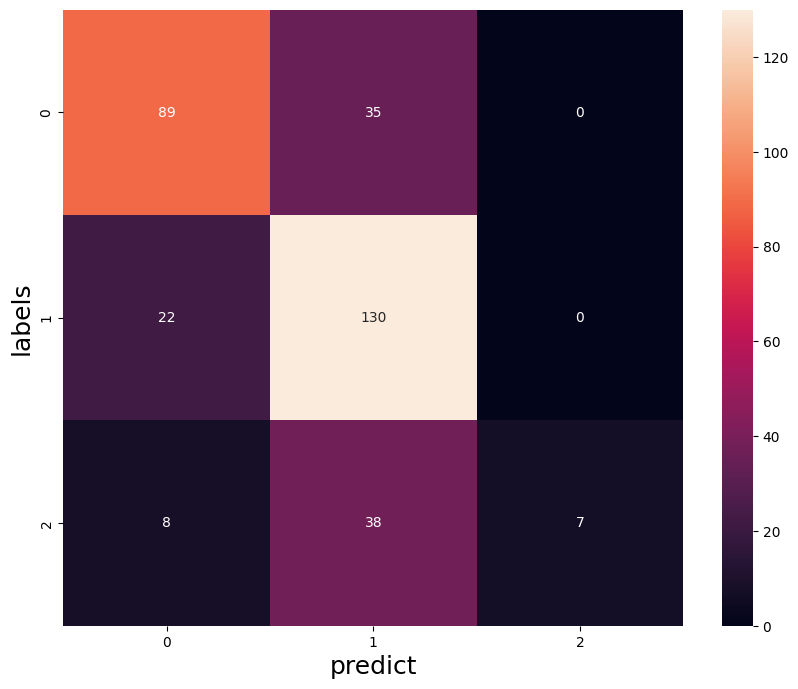

In [9]:
# visualizar resultado
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df['sentimento_tweet'].unique(), yticklabels=df['sentimento_tweet'].unique())
plt.ylabel('labels',fontsize=18)
plt.xlabel('predict',fontsize=18)

In [10]:
# visao geral da pra avaliar o modelo em base de teste
print(classification_report(y_test, y_pred,target_names=df['sentimento_tweet'].astype(str).unique()))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       124
           1       0.64      0.86      0.73       152
           2       1.00      0.13      0.23        53

    accuracy                           0.69       329
   macro avg       0.80      0.57      0.57       329
weighted avg       0.74      0.69      0.65       329



In [11]:
# save modelos
joblib.dump(vectorizer, "modelos/TfidfVectorizer.pkl") 
joblib.dump(clf, "modelos/modelNB_TfidfVectorizer.pkl") 

['modelos/modelNB_TfidfVectorizer.pkl']

In [12]:
# model2

In [13]:
X = df['texto_tweet']
labels = df['sentimento_tweet']

In [14]:
# data clean
X = [utils.clean_tweet(x) for x in X]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)
X.shape

(1096, 2797)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,labels,test_size = 0.3,random_state=42)

In [16]:
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.6595744680851063


Text(0.5, 58.7222222222222, 'predict')

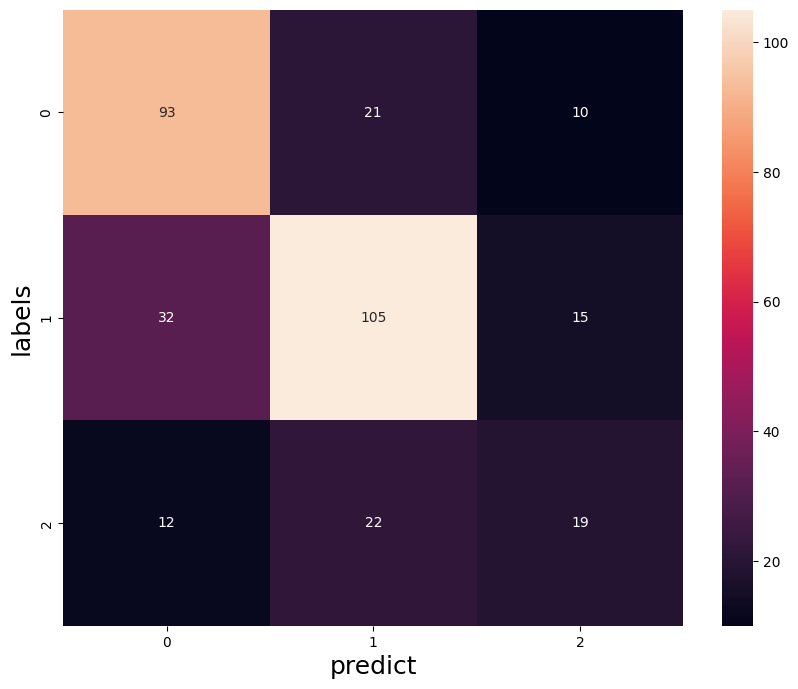

In [17]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df['sentimento_tweet'].unique(), yticklabels=df['sentimento_tweet'].unique())
plt.ylabel('labels',fontsize=18)
plt.xlabel('predict',fontsize=18)

In [18]:
print(classification_report(y_test, y_pred,target_names=df['sentimento_tweet'].astype(str).unique()))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71       124
           1       0.71      0.69      0.70       152
           2       0.43      0.36      0.39        53

    accuracy                           0.66       329
   macro avg       0.61      0.60      0.60       329
weighted avg       0.65      0.66      0.66       329



In [19]:
# save
joblib.dump(vectorizer, "modelos/CountVectorizer.pkl") 
joblib.dump(clf, "modelos/modelNB_CountVectorizer.pkl") 

['modelos/modelNB_CountVectorizer.pkl']

In [20]:
# model3

In [21]:
df_test=df[['sentimento_tweet','texto_tweet']]
# data clean
df_test['texto_tweet'] = [utils.clean_tweet(x) for x in df['texto_tweet']]

/var/folders/0p/ffm0lz013qlcmq18mn7ffj9r0000gn/T/ipykernel_84396/156805149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['texto_tweet'] = [utils.clean_tweet(x) for x in df['texto_tweet']]


In [22]:
df_test['sentimento_tweet_id'] = df_test['sentimento_tweet'].factorize()[0]
# mapping
sentimento_tweet_id_df = df_test[['sentimento_tweet', 'sentimento_tweet_id']].drop_duplicates().sort_values('sentimento_tweet_id').reset_index(drop=True)
sentimento_tweet_to_id = dict(sentimento_tweet_id_df.values)
id_to_sentimento_tweet = dict(sentimento_tweet_id_df[['sentimento_tweet_id', 'sentimento_tweet']].values)

/var/folders/0p/ffm0lz013qlcmq18mn7ffj9r0000gn/T/ipykernel_84396/2183259945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['sentimento_tweet_id'] = df_test['sentimento_tweet'].factorize()[0]


In [23]:
# Definir as 50.000 palavras mais frequentes
MAX_NB_WORDS = 50000
# Definir o comprimento máximo de cada cut_review 
MAX_SEQUENCE_LENGTH = 500
# Definir a dimensão da camada de Embedding
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(df_test['texto_tweet'].values)
word_index = tokenizer.word_index

In [24]:
X = tokenizer.texts_to_sequences(df_test['texto_tweet'].values)
# unificar pra a mesma dimensão
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

# one hot, label pra array
Y = pd.get_dummies(df_test['sentimento_tweet_id']).values
print(X.shape)
print(Y.shape)

(1096, 500)
(1096, 3)


In [25]:
# separar trainar e teste
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(876, 500) (876, 3)
(220, 500) (220, 3)


In [26]:
# definir os parametros do modelo
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 500, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 5042435 (19.24 MB)
Trainable params: 5042435 (19.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [27]:
epochs = 5
batch_size = 64
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
13/13 [==============================] - 8s 418ms/step - loss: 1.0703 - accuracy: 0.4454 - val_loss: 1.0223 - val_accuracy: 0.4545
Epoch 2/5
13/13 [==============================] - 5s 385ms/step - loss: 1.0059 - accuracy: 0.4848 - val_loss: 0.9906 - val_accuracy: 0.5682
Epoch 3/5
13/13 [==============================] - 5s 400ms/step - loss: 0.9415 - accuracy: 0.6599 - val_loss: 0.9749 - val_accuracy: 0.5455
Epoch 4/5
13/13 [==============================] - 6s 455ms/step - loss: 0.8288 - accuracy: 0.6472 - val_loss: 0.8981 - val_accuracy: 0.6023
Epoch 5/5
13/13 [==============================] - 7s 494ms/step - loss: 0.6692 - accuracy: 0.7246 - val_loss: 0.8583 - val_accuracy: 0.6136


In [28]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

7/7 [==============================] - 0s 43ms/step - loss: 0.8306 - accuracy: 0.6136
Test set
  Loss: 0.831
  Accuracy: 0.614


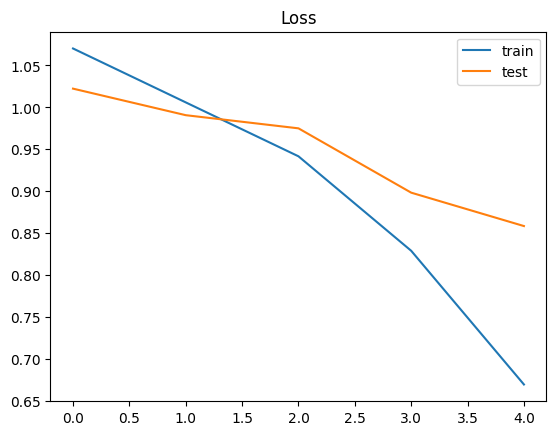

In [29]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

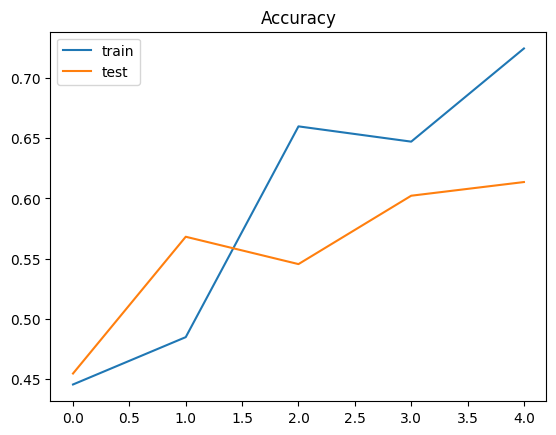

In [30]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [31]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis = 1)
Y_test = Y_test.argmax(axis = 1)

7/7 [==============================] - 1s 44ms/step


Text(0.5, 58.7222222222222, 'predict')

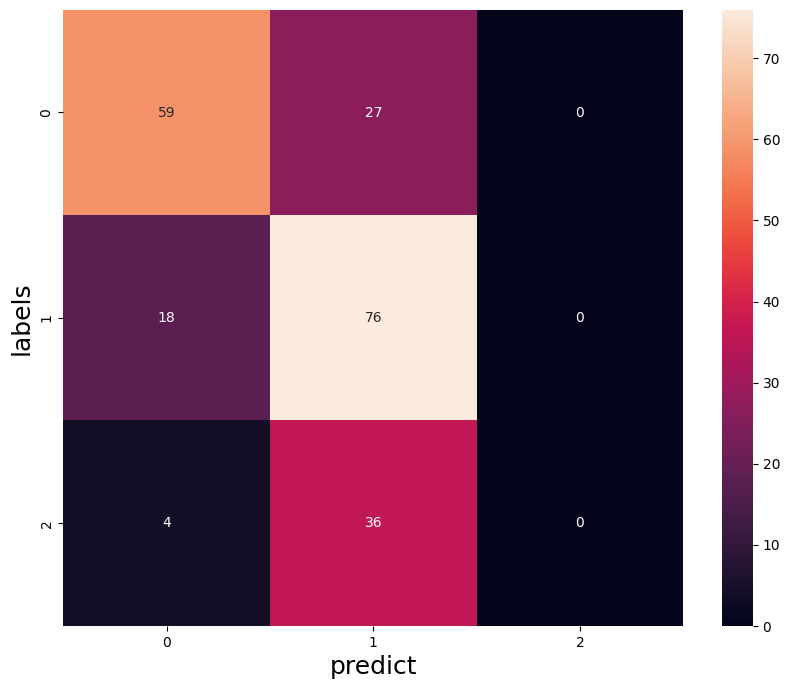

In [32]:
conf_mat = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=sentimento_tweet_id_df.sentimento_tweet.values, yticklabels=sentimento_tweet_id_df.sentimento_tweet.values)
plt.ylabel('labels',fontsize=18)
plt.xlabel('predict',fontsize=18)

In [33]:
print('accuracy %s' % accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred,target_names=sentimento_tweet_id_df['sentimento_tweet'].astype(str).values))

accuracy 0.6136363636363636
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        86
           1       0.55      0.81      0.65        94
           2       0.00      0.00      0.00        40

    accuracy                           0.61       220
   macro avg       0.43      0.50      0.45       220
weighted avg       0.52      0.61      0.55       220



/Users/zzz/Downloads/anaconda3/envs/bancobv_entrevista/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zzz/Downloads/anaconda3/envs/bancobv_entrevista/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zzz/Downloads/anaconda3/envs/bancobv_entrevista/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [34]:
# save
model.save('modelos/LSTM_64.keras')